In [39]:
#Load Packages
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation

#Generate 2 sets of X variables
#LSTMs have unique 3-dimensional input requirements 
seq_length = 5
X =[[i+j for j in range(seq_length)] for i in range(100)]
#X_simple =[[i for i in range(4,104)]]
X =np.array(X)
#X_simple=np.array(X_simple)

In [40]:
X

array([[  0,   1,   2,   3,   4],
       [  1,   2,   3,   4,   5],
       [  2,   3,   4,   5,   6],
       [  3,   4,   5,   6,   7],
       [  4,   5,   6,   7,   8],
       [  5,   6,   7,   8,   9],
       [  6,   7,   8,   9,  10],
       [  7,   8,   9,  10,  11],
       [  8,   9,  10,  11,  12],
       [  9,  10,  11,  12,  13],
       [ 10,  11,  12,  13,  14],
       [ 11,  12,  13,  14,  15],
       [ 12,  13,  14,  15,  16],
       [ 13,  14,  15,  16,  17],
       [ 14,  15,  16,  17,  18],
       [ 15,  16,  17,  18,  19],
       [ 16,  17,  18,  19,  20],
       [ 17,  18,  19,  20,  21],
       [ 18,  19,  20,  21,  22],
       [ 19,  20,  21,  22,  23],
       [ 20,  21,  22,  23,  24],
       [ 21,  22,  23,  24,  25],
       [ 22,  23,  24,  25,  26],
       [ 23,  24,  25,  26,  27],
       [ 24,  25,  26,  27,  28],
       [ 25,  26,  27,  28,  29],
       [ 26,  27,  28,  29,  30],
       [ 27,  28,  29,  30,  31],
       [ 28,  29,  30,  31,  32],
       [ 29,  

In [41]:
y =[[ i+(i-1)*.5+(i-2)*.2+(i-3)*.1 for i in range(4,104)]]
y =np.array(y)

In [42]:
y

array([[  6. ,   7.8,   9.6,  11.4,  13.2,  15. ,  16.8,  18.6,  20.4,
         22.2,  24. ,  25.8,  27.6,  29.4,  31.2,  33. ,  34.8,  36.6,
         38.4,  40.2,  42. ,  43.8,  45.6,  47.4,  49.2,  51. ,  52.8,
         54.6,  56.4,  58.2,  60. ,  61.8,  63.6,  65.4,  67.2,  69. ,
         70.8,  72.6,  74.4,  76.2,  78. ,  79.8,  81.6,  83.4,  85.2,
         87. ,  88.8,  90.6,  92.4,  94.2,  96. ,  97.8,  99.6, 101.4,
        103.2, 105. , 106.8, 108.6, 110.4, 112.2, 114. , 115.8, 117.6,
        119.4, 121.2, 123. , 124.8, 126.6, 128.4, 130.2, 132. , 133.8,
        135.6, 137.4, 139.2, 141. , 142.8, 144.6, 146.4, 148.2, 150. ,
        151.8, 153.6, 155.4, 157.2, 159. , 160.8, 162.6, 164.4, 166.2,
        168. , 169.8, 171.6, 173.4, 175.2, 177. , 178.8, 180.6, 182.4,
        184.2]])

In [43]:
#X_simple=X_simple.reshape((100,1))
X=X.reshape((100,5,1))
y=y.reshape((100,1))

In [44]:
model = Sequential()
model.add(LSTM(8,input_shape=(5,1),return_sequences=False))#True = many to many
model.add(Dense(2,kernel_initializer='normal',activation='linear'))
model.add(Dense(1,kernel_initializer='normal',activation='linear'))
model.compile(loss='mse',optimizer ='adam',metrics=['accuracy'])
model.fit(X,y,epochs=2000,batch_size=5,validation_split=0.05,verbose=0);

In [45]:
scores = model.evaluate(X,y,verbose=1,batch_size=5)
print('Accurracy: {}'.format(scores[1])) 

100/100 [==============================] - 0s 101us/step
Accurracy: 0.19000000283122062


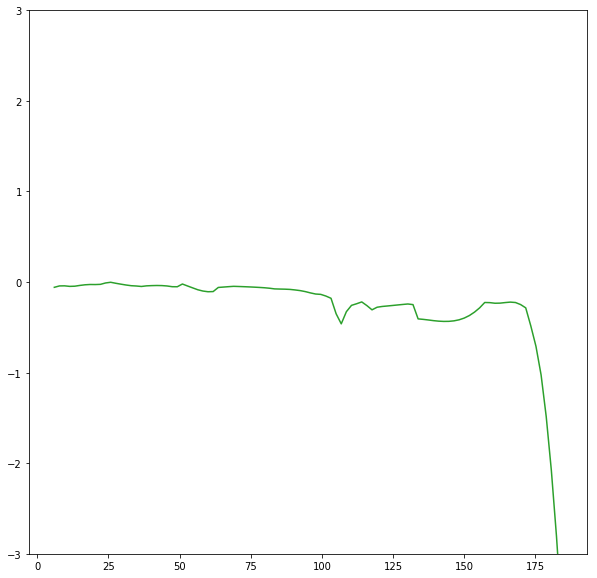

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
predict=model.predict(X)
plt.plot(y, predict-y, 'C2')
plt.ylim(ymax = 3, ymin = -3)
plt.show()

In [47]:
print(predict)

[[  5.9412804]
 [  7.7566004]
 [  9.557594 ]
 [ 11.351727 ]
 [ 13.153659 ]
 [ 14.962336 ]
 [ 16.769218 ]
 [ 18.57249  ]
 [ 20.371872 ]
 [ 22.17406  ]
 [ 23.989353 ]
 [ 25.796986 ]
 [ 27.585903 ]
 [ 29.376003 ]
 [ 31.166782 ]
 [ 32.959175 ]
 [ 34.755836 ]
 [ 36.550713 ]
 [ 38.357525 ]
 [ 40.16004  ]
 [ 41.961365 ]
 [ 43.760376 ]
 [ 45.556164 ]
 [ 47.34813  ]
 [ 49.147552 ]
 [ 50.9777   ]
 [ 52.756073 ]
 [ 54.53521  ]
 [ 56.31446  ]
 [ 58.10026  ]
 [ 59.892494 ]
 [ 61.694397 ]
 [ 63.53974  ]
 [ 65.3441   ]
 [ 67.14835  ]
 [ 68.95221  ]
 [ 70.75035  ]
 [ 72.54825  ]
 [ 74.3459   ]
 [ 76.14322  ]
 [ 77.940125 ]
 [ 79.73649  ]
 [ 81.53123  ]
 [ 83.323845 ]
 [ 85.122116 ]
 [ 86.920815 ]
 [ 88.718216 ]
 [ 90.512215 ]
 [ 92.30484  ]
 [ 94.093834 ]
 [ 95.87943  ]
 [ 97.66726  ]
 [ 99.46339  ]
 [101.24493  ]
 [103.020325 ]
 [104.649124 ]
 [106.33823  ]
 [108.27241  ]
 [110.14223  ]
 [111.96003  ]
 [113.78006  ]
 [115.53971  ]
 [117.292816 ]
 [119.121605 ]
 [120.93004  ]
 [122.73529  ]
 [124.5408